DBSCAN is a popular algorithm for finding clusters of spatial data. It identifies core points that have a sufficient number of neighbors (defined by the user) within a certain distance (also defined by the user). Points that are not core points but are within a distance of a core point are considered as boundary points of the cluster. Points that are not core points and are not within a distance of a core point are considered as outliers and are not part of any cluster.

The algorithm requires two parameters:

epsilon — the two points that can be the farthest apart from each other and are still considered connected or related. epsilon must be a positive double floating point number. minPoints — the minimum number of neighbor points (defined by epsilon). A point needs minPoints neighbors to be considered a core point. minPoints must be a positive integer.

In [1]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sedona.spark import SedonaContext

config = SedonaContext.builder().getOrCreate()
sedona = SedonaContext.create(config)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [18]:
from sedona.spark import *

In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

This code generates data for clustering analysis using the make_blobs function from the sklearn.datasets library
We define three cluster centers in 2D space:

Point (1,1)

Point (-1,-1)

Point (1,-1)

The data will be generated around these points.

In [4]:
center_clusters = [[1, 1], [-1, -1], [1, -1]]
feature_matrix, labels_true = make_blobs(
   n_samples=750, centers=center_clusters, cluster_std=0.4, random_state=0
)

In [5]:
feature_matrix

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [10]:
b = len(feature_matrix)

In [8]:
a = len(labels_true)

In [11]:
b

750

In [9]:
a

750

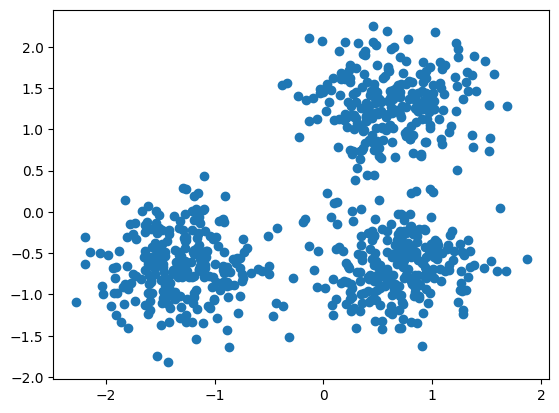

In [12]:
feature_matrix = StandardScaler().fit_transform(feature_matrix)

plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1])
plt.show()

Klastrowanie
W poniższej sekcji użyjemy implementacji DBSCAN w Wherobots do klastrowania danych w ramce danych, ustawiając epsilon na 0,3 i minPoints na 10.

DBSCAN Wherobots domyślnie zwraca wartości odstające.

In [13]:
import pyspark.sql.functions as f
from sedona.sql.st_constructors import ST_MakePoint
from sedona.stats.clustering.dbscan import dbscan

In [14]:
df = sedona.createDataFrame(feature_matrix).select(ST_MakePoint("_1", "_2").alias("geometry"))

In [16]:
df.show(truncate=False)

+-----------------------------------------------+
|geometry                                       |
+-----------------------------------------------+
|POINT (0.4942609672494114 1.4510669654101749)  |
|POINT (-1.4280809932351524 -0.8370637666900247)|
|POINT (0.3385591823843558 1.0387587093943793)  |
|POINT (0.1190010137807008 -1.0539755333636862) |
|POINT (1.122424604448669 1.774936544363838)    |
|POINT (-1.2615698970670386 0.2718813542993483) |
|POINT (-1.301547746257914 -0.7620620251479828) |
|POINT (0.5856986515209378 -0.3391046281566996) |
|POINT (1.0824721201412892 0.8868553969118339)  |
|POINT (1.014166678090506 1.341140223905319)    |
|POINT (-1.2157819589318437 -0.6010212388580108)|
|POINT (-1.250217825928667 -1.0576165033484355) |
|POINT (-1.0516041557218532 -0.7800841561414469)|
|POINT (1.152634492718844 -0.6485399059181498)  |
|POINT (-0.7832991405810525 -1.2248966984992793)|
|POINT (0.2025871474193737 1.6110484893636978)  |
|POINT (-1.4302078985129338 -1.8238006773251054)|


In [19]:
SedonaKepler.create_map(df, "Hiking Trails")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Hiking Trails': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1…

In [20]:
clusters_df = dbscan(df, 0.3, 10, include_outliers=True)

In [21]:
clusters_df.show()

+--------------------+------+-------+
|            geometry|isCore|cluster|
+--------------------+------+-------+
|POINT (1.22185277...| false|      1|
|POINT (0.77885034...| false|      1|
|POINT (-2.2744742...| false|      2|
|POINT (-0.3767222...| false|      1|
|POINT (-2.1902087...| false|      2|
|POINT (-1.7924512...| false|      2|
|POINT (1.68141770...| false|      0|
|POINT (-0.2789764...| false|      0|
|POINT (0.90491286...| false|      0|
|POINT (-0.1669991...| false|      0|
|POINT (-0.0811644...| false|      0|
|POINT (-0.9041139...| false|      2|
|POINT (0.26265846...| false|      0|
|POINT (1.59302092...| false|      0|
|POINT (1.28828508...| false|      0|
|POINT (0.58745294...| false|      1|
|POINT (0.80203143...| false|      0|
|POINT (1.36805165...| false|      1|
|POINT (1.51904736...| false|      1|
|POINT (-2.0514671...| false|      2|
+--------------------+------+-------+
only showing top 20 rows



In [22]:
import geopandas as gpd
import pyspark.sql.types as t


<Axes: >

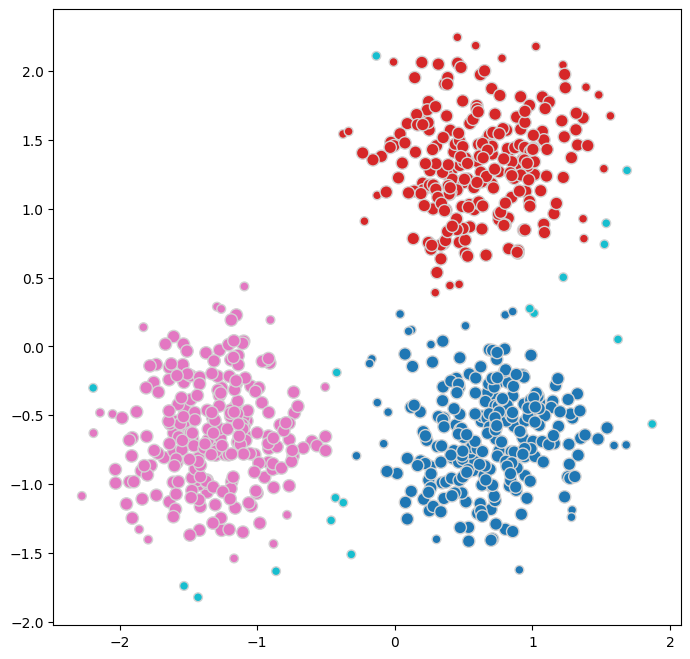

In [23]:
pdf = (clusters_df
       .withColumn("isCore", (f.col("isCore").cast(t.IntegerType()) + 1) * 40)
       .withColumn("cluster", f.hash("cluster").cast(t.StringType()))
       .toPandas()
      )
gdf = gpd.GeoDataFrame(pdf, geometry="geometry")

gdf.plot(
    figsize=(10, 8),
    column="cluster",
    markersize=gdf['isCore'],
    edgecolor='lightgray',
)

In [24]:
pdf = (clusters_df
       .withColumn("isCore", (f.col("isCore").cast(t.IntegerType()) + 1) * 40)
       .withColumn("cluster", f.hash("cluster").cast(t.StringType()))
       .toPandas()
      )

In [27]:
pdf

,geometry,isCore,cluster
0,POINT (1.2218527777408799 2.044791293664616),40,-1712319331
1,POINT (0.7788503407620916 2.0934907184362337),40,-1712319331
2,POINT (-2.274474267187038 -1.0875204800189273),40,-797927272
3,POINT (-0.3767222585750565 1.5430006451675449),40,-1712319331
4,POINT (-2.1902087232330696 -0.6305889736274121),40,-797927272
...,...,...,...
745,POINT (1.8704380269391903 -0.564764189614707),40,-939490007
746,POINT (-0.8633880348676239 -1.6343179570876403),40,-939490007
747,POINT (0.9807011013072032 0.2737320236327404),40,-939490007
748,POINT (-0.3164503027801608 -1.5121892088469662),40,-939490007


In [28]:
gdf = gpd.GeoDataFrame(pdf, geometry="geometry")

In [29]:
gdf

,geometry,isCore,cluster
0,POINT (1.22185 2.04479),40,-1712319331
1,POINT (0.77885 2.09349),40,-1712319331
2,POINT (-2.27447 -1.08752),40,-797927272
3,POINT (-0.37672 1.543),40,-1712319331
4,POINT (-2.19021 -0.63059),40,-797927272
...,...,...,...
745,POINT (1.87044 -0.56476),40,-939490007
746,POINT (-0.86339 -1.63432),40,-939490007
747,POINT (0.9807 0.27373),40,-939490007
748,POINT (-0.31645 -1.51219),40,-939490007
